## План работы
### Шаг 1. Загрузить данные данные и подготовить их к анализу
Загрузить данные о визитах, заказах и расходах в переменные. Оптимизаровать данные для анализа. Убедиться, что тип данных в каждой колонке — правильный. Путь к файлам:

/datasets/visits_info.csv
/datasets/orders_info.csv
/datasets/costs_info.csv
### Шаг 2. Провести исследовательский анализ данных
Построить профили пользователей. Определить минимальную и максимальную дату привлечения пользователей.

Выяснить:

Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?
### Шаг 3. Построить отчёты и посчитайте метрики
Продукт:

Сколько людей пользуются в день, неделю, месяц?
Сколько сессий в день?
Сколько длится одна сессия?
Продажи:

Когда люди начинают покупать?
Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день?
Какой средний чек за месяц, неделю, день?
Маркетинг:

Сколько денег потратили? Всего / на каждый источник / по времени
Сколько в среднем стоило привлечение одного покупателя из каждого источника?
### Шаг 4. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии
Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

### Шаг 5. Отценить окупаемость рекламы для привлечения пользователей
С помощью LTV и ROI:

Проанализировать общую окупаемость рекламы;
Проанализировать окупаемость рекламы с разбивкой по устройствам;
Проанализировать окупаемость рекламы с разбивкой по странам;
Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.
Описать проблемы, которые мы обнаружили. Ответить на вопросы:

Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.
Описать возможные причины обнаруженных проблем и сформировать рекомендации для рекламного отдела. 

### Шаг 6. Написать выводы
Выдклить причины неэффективности привлечения пользователей;
Сформировать рекомендации для отдела маркетинга для повышения эффективности.

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
data_v = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
data_o = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
data_c = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
print(data_v.info())
print(data_o.info())
print(data_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #  

In [4]:
data_v.columns = (['user_id','region','device','channel','session_start','session_end'])
data_o.columns = (['user_id','event_dt','revenu'])
data_c.columns = (['dt','channel','cost'])

In [5]:
#Переведем даты в нужный формат:
data_v['session_start'] = pd.to_datetime(data_v['session_start'])
data_v['session_end'] = pd.to_datetime(data_v['session_end'])
data_o['event_dt'] = pd.to_datetime(data_o['event_dt'])
data_c['dt'] = pd.to_datetime(data_c['dt']).dt.date

In [6]:
#Проверка данных на пропуски и дубликаты
print(data_v.duplicated().sum())
print(data_o.duplicated().sum())
print(data_c.duplicated().sum())
print(data_v.isna().sum())
print(data_o.isna().sum())
print(data_c.isna().sum())

0
0
0
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
user_id     0
event_dt    0
revenu      0
dtype: int64
dt         0
channel    0
cost       0
dtype: int64


In [7]:
data_v.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [8]:
data_o = data_o.rename(columns = {'revenu':'revenue'})
data_o.head(5)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [9]:
data_c = data_c.rename(columns = {'cost':'costs'})
data_c.sample(5)

,dt,channel,costs
832,2019-08-21,YRabbit,3.78
1638,2019-05-19,lambdaMediaAds,16.80
917,2019-05-18,AdNonSense,46.20
781,2019-07-01,YRabbit,5.22
370,2019-05-11,RocketSuperAds,18.72


С данными все в порядке можно приступать к расчету показателей 

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [10]:
def get_profiless(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

   

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [11]:
# Расчёт Retention Rate :
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#и функция для ее визуализации
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [12]:
# рассчет конверсии:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

# а так же функию для ее визуализации:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [13]:
#рассчет LTV  с  ROI и CAC:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

для получения профилей пользователей  воспользуемся функцией:

In [14]:
def get_profiles(sessions):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first','region':'first','device':'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(data_o['user_id'].unique())

    return profiles

In [15]:
profiles = get_profiles(data_v)
profiles_all = pd.merge(profiles,data_v[['user_id','region','device',]], on ='user_id', how = 'inner')

In [16]:
profiles.sample(5)

,user_id,first_ts,channel,region,device,dt,month,payer
126379,842639155427,2019-06-29 19:54:52,organic,United States,Mac,2019-06-29,2019-06-01,False
132880,886358932570,2019-09-15 08:55:28,organic,United States,Mac,2019-09-15,2019-09-01,False
115726,771178185403,2019-09-28 14:51:38,RocketSuperAds,United States,iPhone,2019-09-28,2019-09-01,False
59013,391520748341,2019-06-06 11:21:42,FaceBoom,United States,Mac,2019-06-06,2019-06-01,False
114023,760115735004,2019-09-25 18:22:28,organic,France,PC,2019-09-25,2019-09-01,False


In [17]:
min_date_a = profiles['dt'].min()
max_date_a = profiles['dt'].max()
print('Начальная дата привлечения',min_date_a)
print('Конечная дата привлечения',max_date_a)


Начальная дата привлечения 2019-05-01
Конечная дата привлечения 2019-10-27


          region  user_id
3  United States   100002
2             UK    17575
0         France    17450
1        Germany    14981


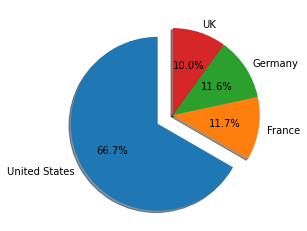

In [24]:
#Рассмотрим из каких стран приходят пользователи в том числе не плтящие:
region_users = profiles.groupby('region', as_index = False).agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False)
print(region_users)

labels = profiles['region'].unique()
fig1, ax1 = plt.subplots()
explode = (0.2, 0, 0, 0) 
ax1.pie(region_users['user_id'], explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

#Рассмотрим из каких стран приходят пользователи только платящие:

               user_id
region                
United States     6902
UK                 700
France             663
Germany            616


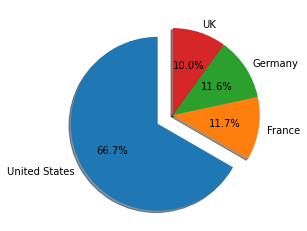

In [29]:
region_p_users = (profiles.query('payer == True').groupby('region').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False))
print(region_p_users)

labels = profiles['region'].unique()
fig1, ax1 = plt.subplots()
explode = (0.2, 0, 0, 0) 
ax1.pie(profiles.groupby('region', as_index = False).agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False)['user_id'], explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

In [30]:
#Рассчитаем долю платящих:
t_all_r = profiles.groupby('region').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False).rename(columns = {'user_id':'all_users'})
t_payer_r = profiles.query('payer == True').groupby('region').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False).rename(columns = {'user_id':'payer_users'})
payer_percent = t_all_r.merge(t_payer_r, on = 'region', how = 'left')
payer_percent['% payer'] = round((payer_percent['payer_users'] / payer_percent['all_users'] * 100),2)
payer_percent

,all_users,payer_users,% payer
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


Страны из которых пришли клиенты : United States UK France Germany.
Больше всего клиентов из штатов.

         user_id
device          
iPhone     54479
Android    35032
PC         30455
Mac        30042


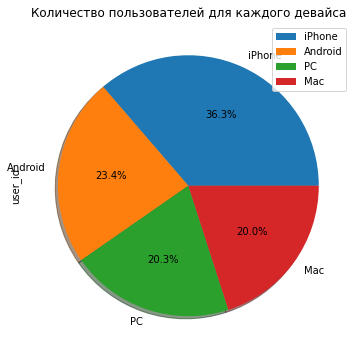

In [31]:
#общее количество пользователей с разбивкой по девайсам
print(profiles.groupby('device').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False))
(profiles.groupby('device').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False)
 .plot.pie(subplots = True, figsize = (6,6), autopct ='%1.1f%%', shadow = True))
plt.title('Количество пользователей для каждого девайса')
plt.show()

         user_id
device          
iPhone      3382
Android     2050
Mac         1912
PC          1537


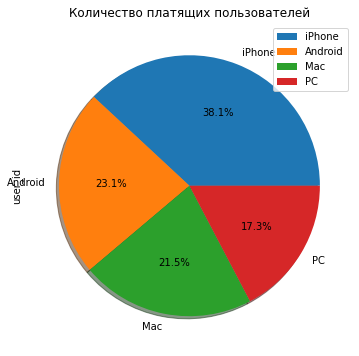

In [32]:
#Количество платящих пользователей с разбивкой по девайсам
print(profiles.query('payer == True').groupby('device').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False))
(profiles.query('payer == True').groupby('device').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False)
 .plot.pie(subplots = True, figsize = (6,6), autopct ='%1.1f%%', shadow = True))
plt.title('Количество платящих пользователей')
plt.show()

In [33]:
#Рассчитаем долю платящих:
t_all_d = profiles.groupby('device').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False).rename(columns = {'user_id':'all_users'})
t_payer_d = profiles.query('payer == True').groupby('device').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False).rename(columns = {'user_id':'payer_users'})
payer_percent = t_all_d.merge(t_payer_d, on = 'device', how = 'left')
payer_percent['% payer'] = round((payer_percent['payer_users'] / payer_percent['all_users'] * 100),2)
payer_percent

,all_users,payer_users,% payer
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05
Mac,30042,1912,6.36


In [34]:
#От куда пришел пользователь (каналы привлечения)
print(profiles['channel'].unique())

['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [35]:
#Число привлеченных клиентов:
print(profiles.groupby('channel').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False))

                    user_id
channel                    
organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149


                    user_id
channel                    
FaceBoom               3557
TipTop                 1878
organic                1160
WahooNetBanner          453
AdNonSense              440
RocketSuperAds          352
LeapBob                 262
OppleCreativeMedia      233
lambdaMediaAds          225
YRabbit                 165
MediaTornado            156


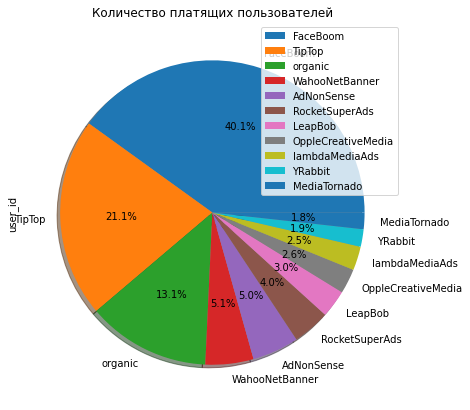

In [36]:
#Число привлеченных платящих клиентов:
print(profiles.query('payer == True').groupby('channel').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False))
(profiles.query('payer == True').groupby('channel').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False)
 .plot.pie(subplots = True, figsize = (7,7), autopct ='%1.1f%%', shadow = True))
plt.title('Количество платящих пользователей')
plt.show()


In [37]:
#Рассчитаем долю платящих:
t_all_c = profiles.groupby('channel').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False).rename(columns = {'user_id':'all_users'})
t_payer_c = profiles.query('payer == True').groupby('channel').agg({'user_id':'count'}).sort_values(by = 'user_id', ascending = False).rename(columns = {'user_id':'payer_users'})
payer_percent = t_all_c.merge(t_payer_c, on = 'channel', how = 'left')
payer_percent['% payer'] = round((payer_percent['payer_users'] / payer_percent['all_users'] * 100),2)
payer_percent.sort_values(by = 'all_users', ascending = False)

,all_users,payer_users,% payer
channel,,,
organic,56439,1160,2.06
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
OppleCreativeMedia,8605,233,2.71
LeapBob,8553,262,3.06
WahooNetBanner,8553,453,5.30
RocketSuperAds,4448,352,7.91
MediaTornado,4364,156,3.57
YRabbit,4312,165,3.83


### Вывод:
Наибольшее количество пользователей привлечено из US 100002 клиентов это 66.7% все привлеченной аудитории. Самое популярное устройство IPhone, как для платящих так и нет.
Самый эффективный канал привлечения платящих пользователей как по количеству человек така и по процентам - FaceBoom. 
По данному каналу привлечено 29144 клиентов из них 3557 платящих что составляет 12.2% 

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [38]:
#Выясним сколько всего денег было потрачено на привлечение клиентов:
total_sum = data_c['costs'].sum()
print(total_sum)

105497.30000000002


,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


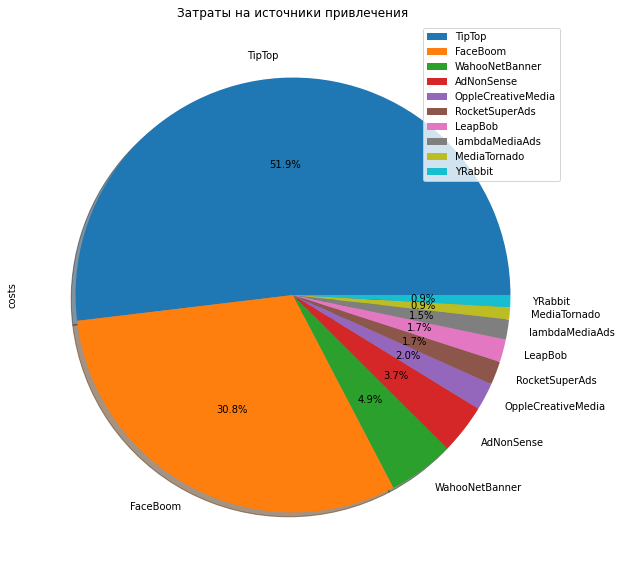

In [39]:
#Затраты на каждый источник:
channel_sum = data_c.groupby('channel').agg({'costs':'sum'}).sort_values(by = 'costs', ascending = False)
display(channel_sum)

channel_sum.plot.pie(subplots = True, figsize = (10,10), autopct ='%1.1f%%', shadow = True)
plt.title('Затраты на источники привлечения')
plt.show()

              costs
dt                 
2019-05-01  304.820
2019-05-02  230.845
2019-05-03  263.070
2019-05-04  337.000
2019-05-05  319.905
...             ...
2019-10-23  592.995
2019-10-24  737.590
2019-10-25  862.600
2019-10-26  952.370
2019-10-27  967.165

[180 rows x 1 columns]


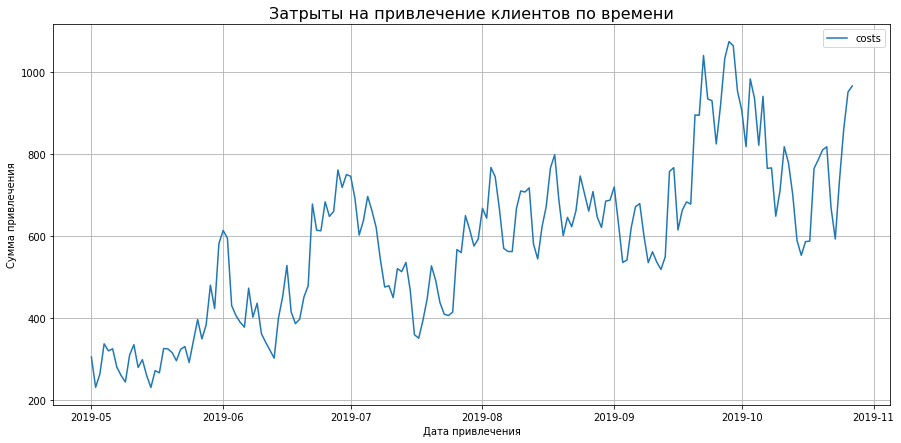

In [40]:
#Затраты по времени:
print(data_c.groupby('dt').agg({'costs':'sum'}))

data_c.groupby('dt').agg({'costs':'sum'}).plot(figsize = (15,7), grid = True)
plt.title('Затрыты на привлечение клиентов по времени', fontsize=16)
plt.ylabel ('Сумма привлечения')
plt.xlabel ('Дата привлечения')
plt.show()

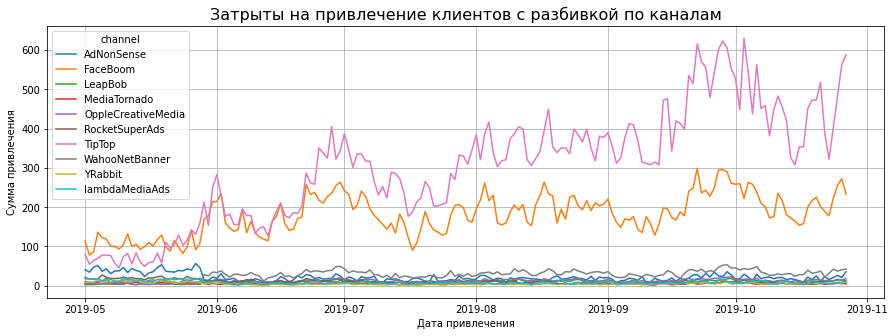

In [41]:
#Затраты по времени с разбивкой по каналам:
data_c.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='costs'  # ID пользователей
      # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.title('Затрыты на привлечение клиентов с разбивкой по каналам', fontsize=16)
plt.ylabel ('Сумма привлечения')
plt.xlabel ('Дата привлечения')
plt.show()

In [42]:
#Рассчитаем сколько в среднем стоило привлечение одного покупателя из каждого источника
ad_cost = channel_sum.merge(data_v.groupby('channel').agg({'user_id':'nunique'}), how = 'left', on = 'channel')
ad_cost['cost_per_user'] = ad_cost['costs'] / ad_cost['user_id']
ad_cost = ad_cost.rename(columns = {'user_id':'new_users'})
ad_cost

,costs,new_users,cost_per_user
channel,,,
TipTop,54751.30,20204,2.709924
FaceBoom,32445.60,29916,1.084557
WahooNetBanner,5151.00,8845,0.582363
AdNonSense,3911.25,4199,0.931472
OppleCreativeMedia,2151.25,8929,0.240928
RocketSuperAds,1833.00,4988,0.367482
LeapBob,1797.60,8875,0.202546
lambdaMediaAds,1557.60,2410,0.646307
MediaTornado,954.48,4895,0.194991


## Вывод:
- Всего на рекламу потратили 105497. Самым дорогим источником оказался TipTop - 54751. 
- Так же источник TipTop оказался самым дорогим по цене за 1 пользователя цена составила - 2.7

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [43]:
#Добавим функции для построения графиков(возможно лучше их перенести в раздел с функциями)

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



### Проанализируйте общую окупаемость рекламы

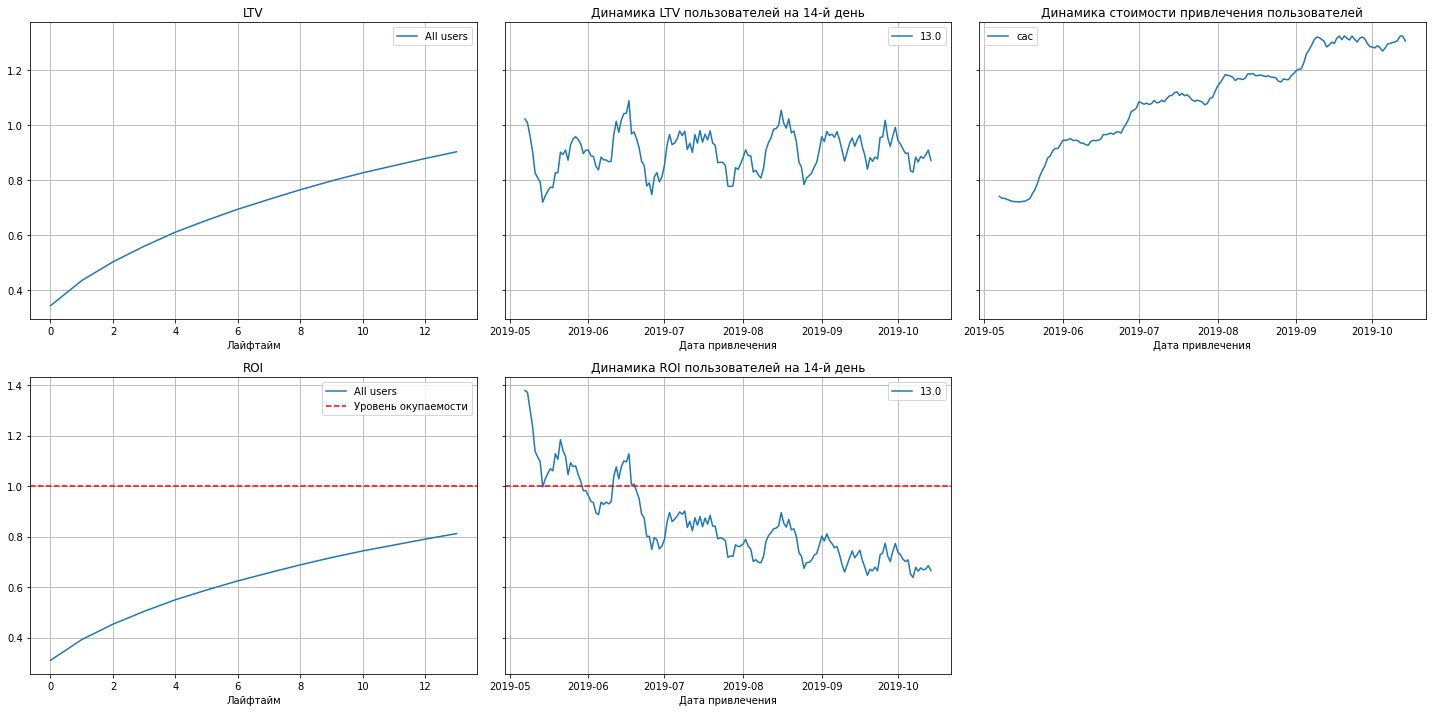

In [44]:
profiless = get_profiless(data_v,data_o, data_c)
profiless = profiless.query('channel != "organic"')
horizon_days = 14
 
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv (profiless,
    data_o,
    max_date_a,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

На графиках видно, что общая цена привлечения САС заметно растет с течением времени. При этом LTV 14 дня примерно остается на том же уровне, даже немного падает. В связи с этим мы можем сделать предположение, что из за роста на привлечение заметно снижается ROI. 

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

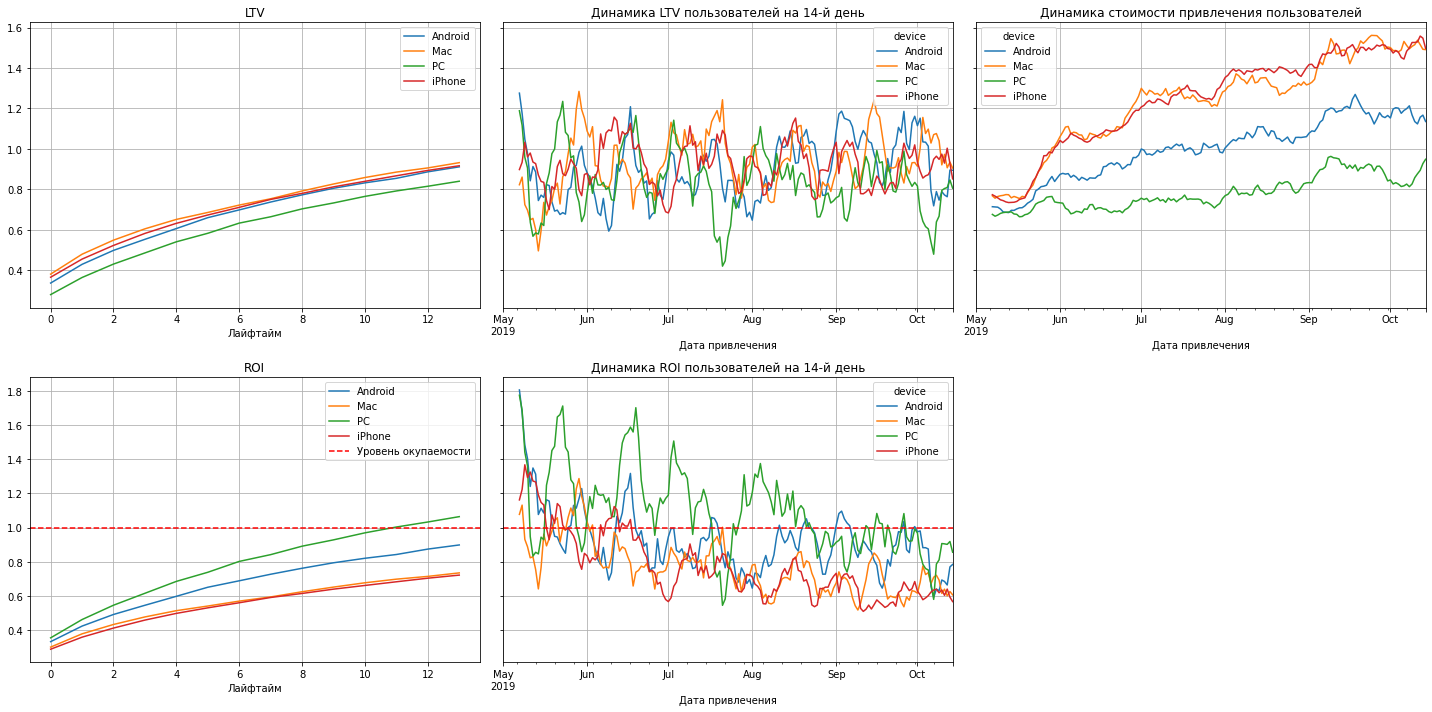

In [45]:
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv (profiless,
    data_o,
    max_date_a,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

In [46]:
#проверим какое количество устройств приходится на США
report_c_d = (profiless.groupby(['region','device'])
          .agg({'acquisition_cost':'sum'}).sort_values(by = 'acquisition_cost')
          .reset_index().query('region == "United States"')
         )

report_d = (profiless.groupby(['device'])
          .agg({'acquisition_cost':'sum'}).sort_values(by = 'acquisition_cost')
          .reset_index())


display(report_c_d,report_d)

,region,device,acquisition_cost
12,United States,PC,9424.116830
13,United States,Android,18168.727630
14,United States,Mac,22585.609834
15,United States,iPhone,40750.145705


,device,acquisition_cost
0,PC,15263.344712
1,Android,22460.629159
2,Mac,24094.537878
3,iPhone,43678.788251


Вероятно проблема не в устройствах а в стране, так как основная доля iPhone и MAC приходится на США.

Стоимость привлечения самая высокая для iPhone и MAC.  Рост приходится на вторую половину июня и далее. Так же эти 2 устройства не достигли минимума окупаемости.

### Проанализируйте окупаемость рекламы с разбивкой по странам

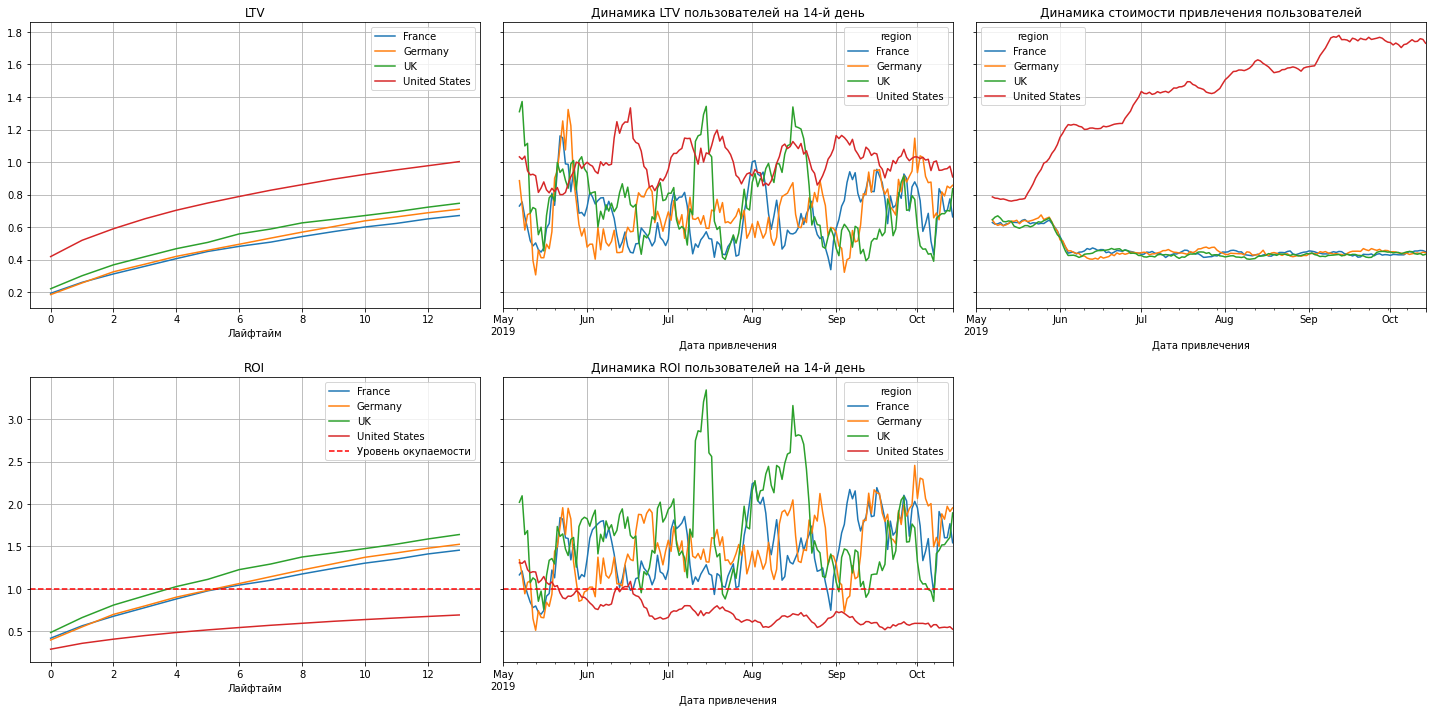

In [47]:
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv (profiless,
    data_o,
    max_date_a,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

По данным графикам можно смело сделать вывод, что стоимость привлечения в US очень высокая из за этого страдает прибыль компании. Она заметно выросла как раз в июне.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

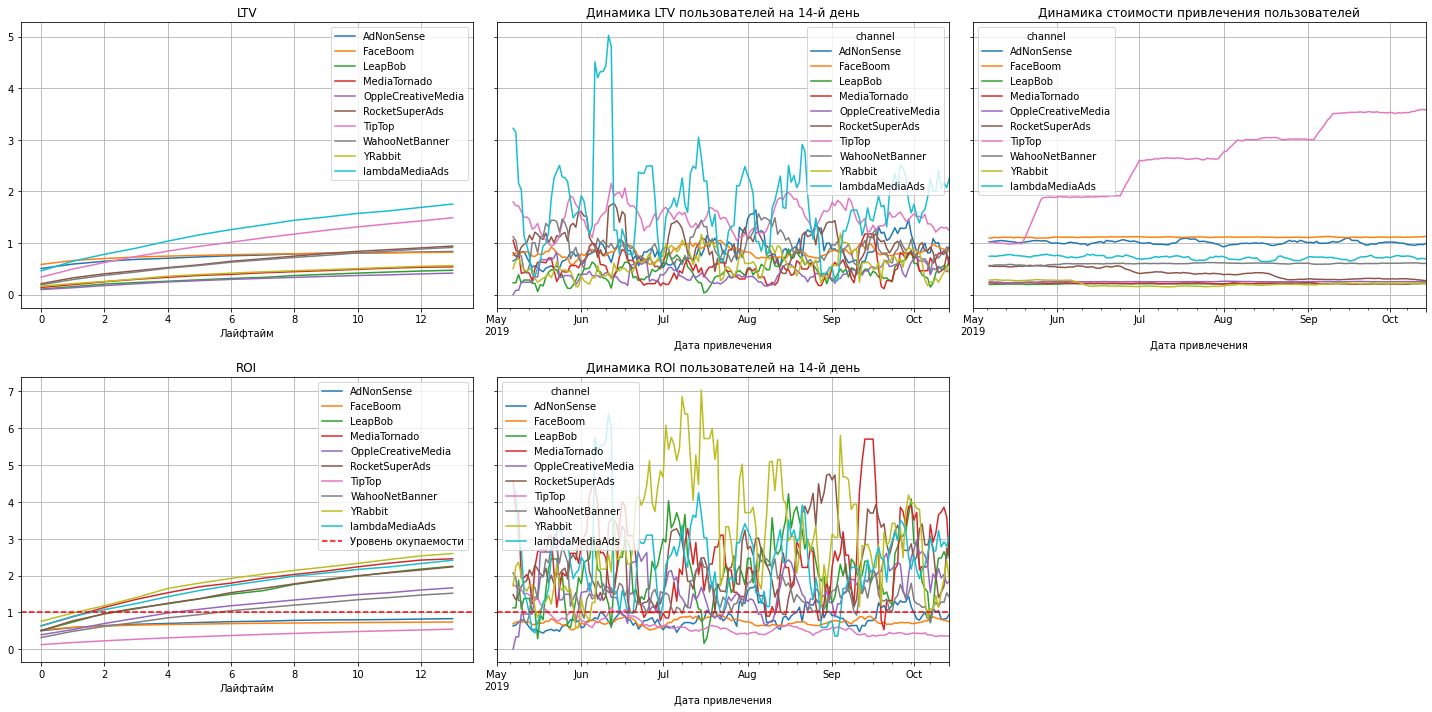

In [48]:
ltv_raw, ltv, ltv_history, roi, roi_history  = get_ltv (profiless,
    data_o,
    max_date_a,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

In [49]:
roi.sort_values(by=13)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
TipTop,17953,2.733487,0.124107,0.181281,0.227717,0.270309,0.308344,0.342514,0.371273,0.401762,0.429099,0.456211,0.480249,0.502173,0.522736,0.545250
FaceBoom,26736,1.113659,0.525497,0.593113,0.628178,0.653688,0.670115,0.682183,0.695121,0.704409,0.711147,0.718724,0.723618,0.729149,0.733844,0.737531
AdNonSense,3627,1.008023,0.501816,0.586992,0.641588,0.677074,0.699185,0.725399,0.747236,0.760885,0.782730,0.795014,0.798017,0.806206,0.818490,0.829417
WahooNetBanner,7832,0.601685,0.316444,0.485073,0.619988,0.729062,0.851269,0.939375,1.044277,1.121577,1.197193,1.266026,1.342479,1.402415,1.470194,1.520177
OppleCreativeMedia,7890,0.249905,0.391262,0.533004,0.698562,0.840299,0.982574,1.083804,1.179977,1.257421,1.335920,1.411847,1.483215,1.534338,1.607775,1.665982
RocketSuperAds,4142,0.420648,0.503574,0.771704,0.957864,1.101063,1.246558,1.373148,1.536453,1.651018,1.774795,1.896259,1.994209,2.074406,2.152308,2.238228
LeapBob,7875,0.209947,0.509553,0.735933,0.971349,1.114418,1.233335,1.366140,1.493507,1.587681,1.759830,1.874520,1.986198,2.085803,2.176347,2.251801
lambdaMediaAds,2012,0.726839,0.633445,0.890174,1.074432,1.238984,1.426723,1.593928,1.733828,1.856667,1.983609,2.068914,2.165823,2.234067,2.326217,2.414941
MediaTornado,4081,0.219005,0.635417,0.882206,1.134578,1.352421,1.532302,1.694224,1.794721,1.928728,2.029247,2.124161,2.235835,2.336332,2.420079,2.454708


In [50]:
report = (profiless.groupby(['region','channel'])
          .agg({'acquisition_cost':'sum'}).sort_values(by = 'acquisition_cost')
          .reset_index().query('region == "United States"')
         )
report = report[report['channel']!='organic']
report = report[['channel','acquisition_cost']]
report.set_index('channel',inplace = True)
display(report)

,acquisition_cost
channel,
YRabbit,944.22
MediaTornado,954.48
RocketSuperAds,1833.00
FaceBoom,32445.60
TipTop,54751.30


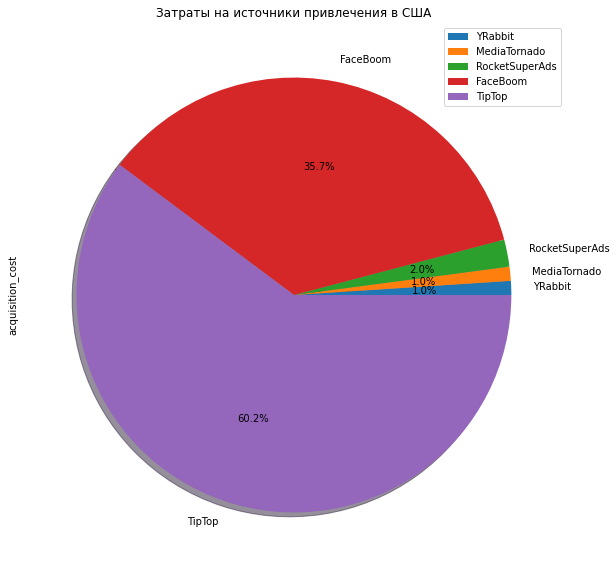

In [51]:
report.plot.pie(subplots = True, figsize = (10,10), autopct ='%1.1f%%', shadow = True)
plt.title('Затраты на источники привлечения в США')
plt.show()

Можем наблюдать что ~96 процента вложенных в рекламу в США не окупается.

По данным графикам мы видим что самый дорогой канал привлечения TipTop его стоимость вырастает в тот момент когда у компании снижается ROI вероятность велика, что на этот канал тратится слишком много средств для привлечения и они не окупаются. 
Так же стоит пересмотреть партнерство с FaceBoom и AdNonSense

На первом графике мы видим что реклама  в целом окупается на 14 день, но уровень окупаемости слишком мал.
Траты на привлечение пользователей утсройств MAC и iPhone достаточно велики, как и привлечение пользователей в США. Так же стоит обратить внимание на такие каналы привлечения как TipTop в первую очереди а так же на  FaceBoom и AdNonSense их окупаемость ниже затрат на привлечение.



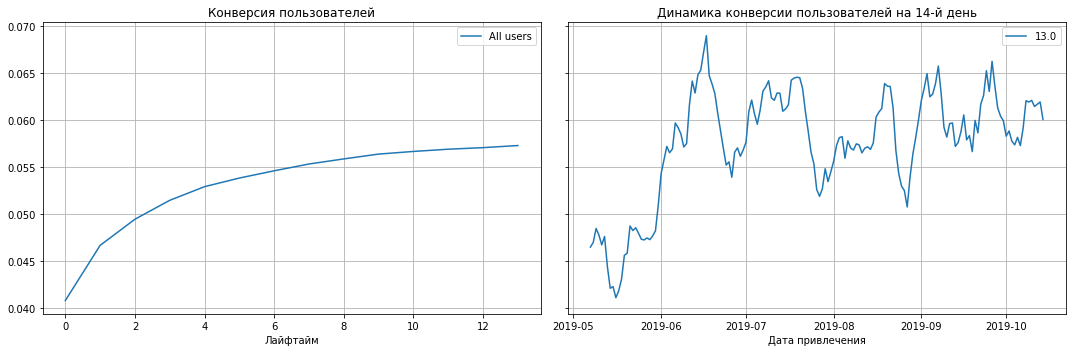

In [52]:
#Проанализируем Конверсию для всех пользователей по времени на 14 день:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, data_o, max_date_a, 14, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)




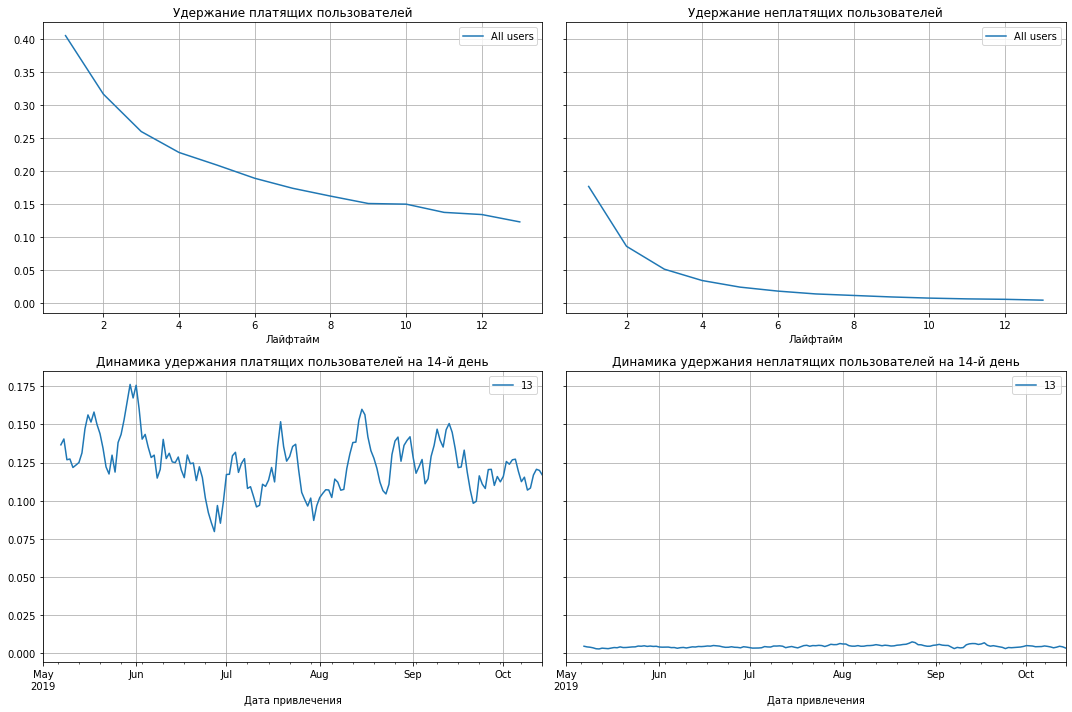

In [53]:
#Проанализируем удержание для всех пользователей по времени на 14 день:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, data_v, max_date_a, 14, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Рассмотрим конверсию и ужержание с разбивками по устройствам, странам, рекламным каналам.

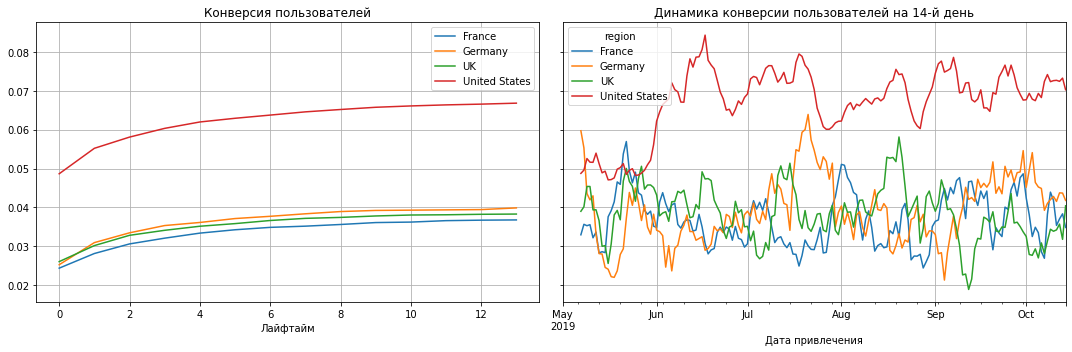

In [54]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, data_o, max_date_a, 14, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

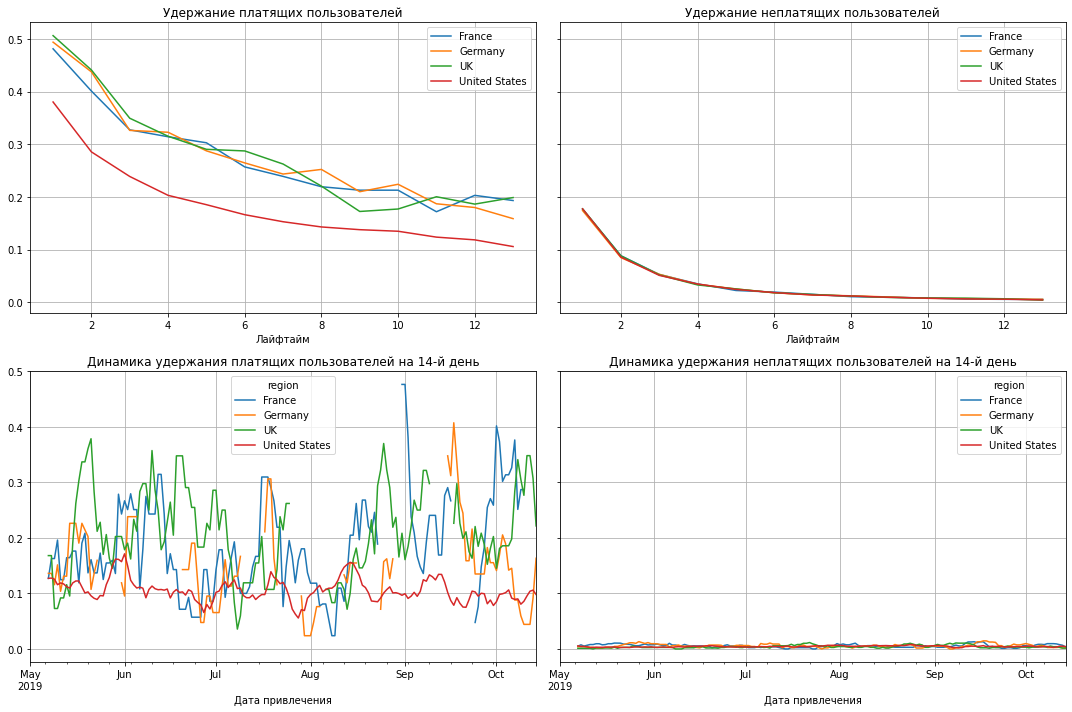

In [55]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, data_v, max_date_a, 14, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Заметно что динамика удержания платящих пользователей в US достаточно низкая.

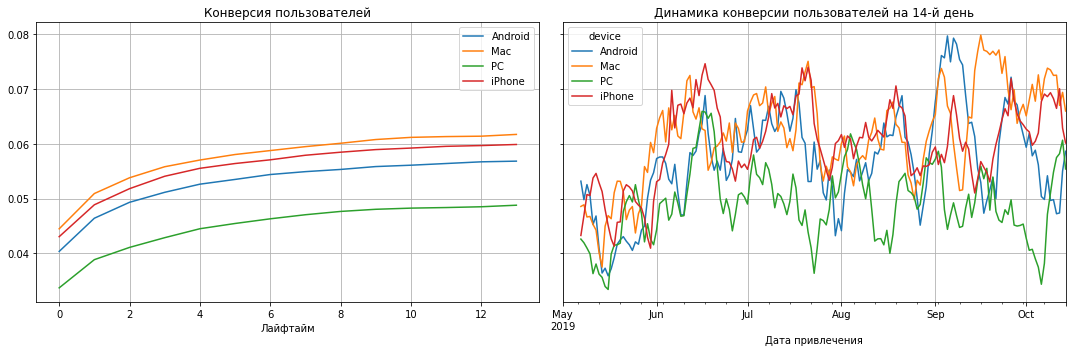

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, data_o, max_date_a, 14, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия для пользователей ПК значительно ниже остальных

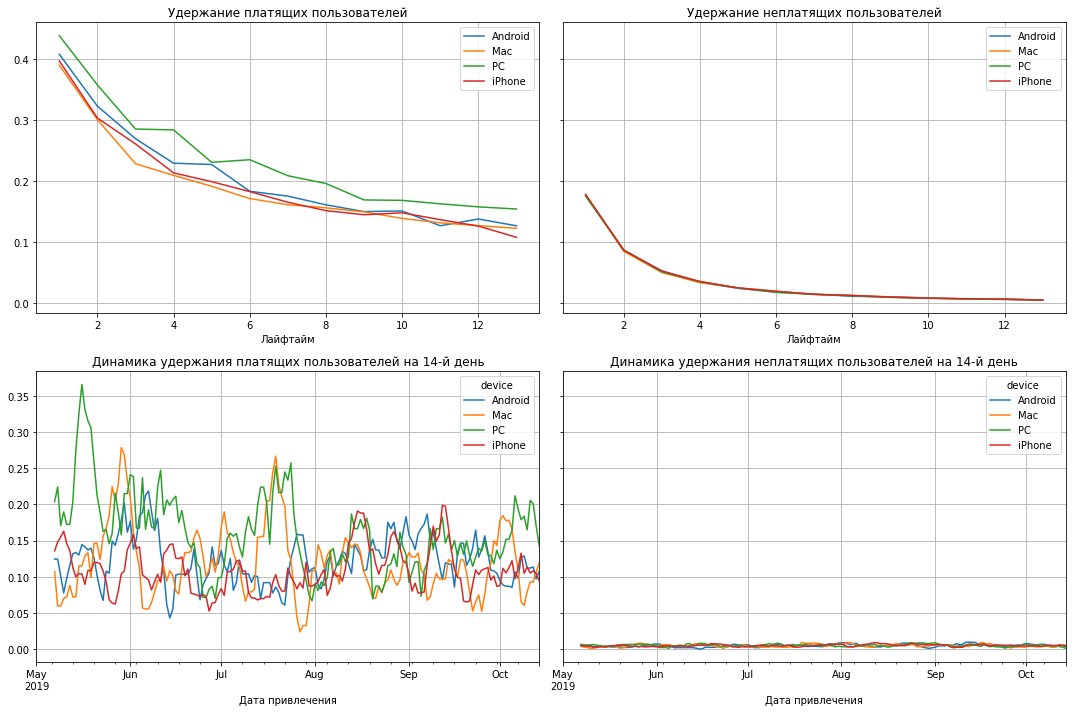

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, data_v, max_date_a, 14, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

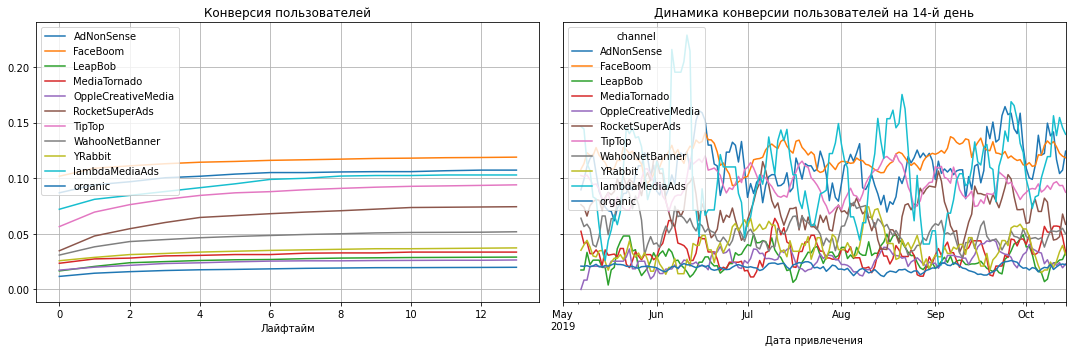

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, data_o, max_date_a, 14, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

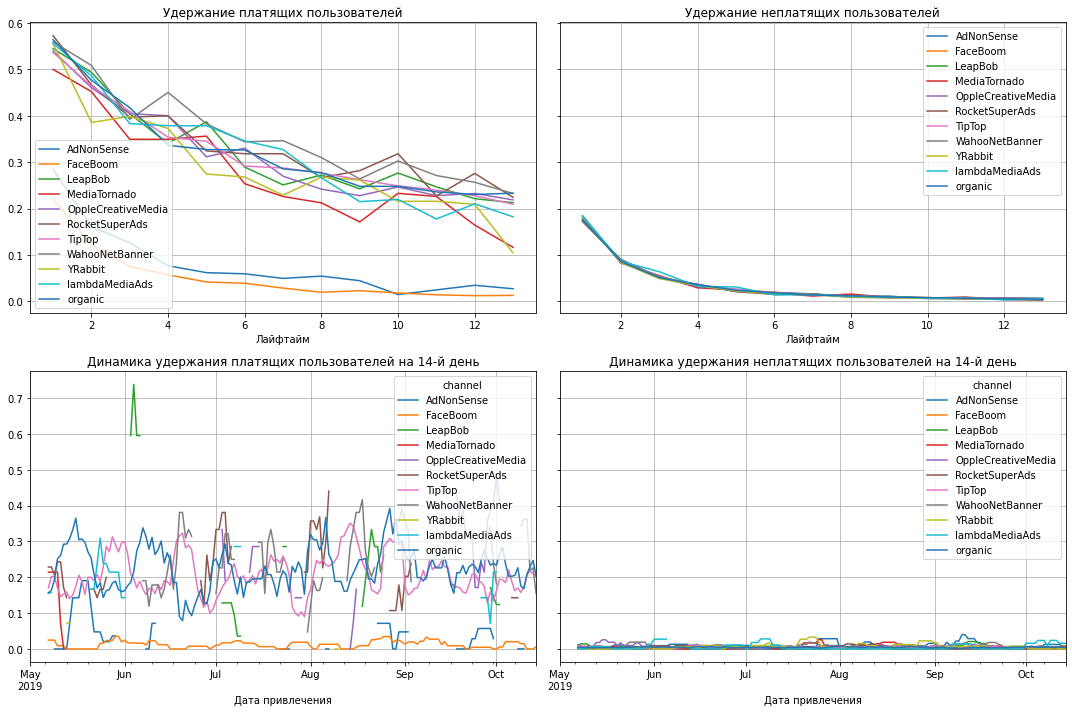

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, data_v, max_date_a, 14, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По данным графикам видно что удержание платящих пользователей от каналов AdNonSence  и FaceBoom крайне низкая.

## Выводы по графикам:
 - В целом рекламная компания убыточна
 - На графиках видно, что цена основного (по затратам) канала привлечения TipTop заметно растет с течением времени.  В связи с этим компания не окупается.
 - Главные каналы убыточных вложений TipTop и FaceBoom, хотя при этом у FaceBoom самый высокий показатель притока платящих пользователей.
 - Хорошие показатели работы рекламы в странах Франции Германии и UK, плохой в США
 - Самый высокий ROI  у пользователей с PC, у MAC и iPhone он не достигают окупаемости.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Основная причина неэффективности привлечения это отсутсвие окупаемости рекламной компании в США по двум каналам рекламы TipTop и FaceBoom на них тратится 82,7% всего бюджета на привлечение и оно не окупается.
Вероятно повлияло резкое повышение стоимости привлечения середине в июня в TipTop.
Помимо этой проблемы исследование показало возможные пролбемы и точки роста: 
 - Рекламные каналы FaceBoom и AdNonSence имеет крайне низкое удержание аудитории. (возможно более эффектианя реклама конкурентов)
 - Конверсия  с PC достаточно низкая.
 - Показатель удержание пользователей в США ниже по сравнению с другими странами. (необходимы дополнительные данные для выявления причин, возможно проблемы с работой приложения в данном регионе, либо агрессивная реклама конкурентов)
 
Положительные стороны:
 - остальные каналы привлечения работаюд хорошо и окупаются к 6 дню привлечения.
 - Во Франции Германии и UK реклама так же стабильно окупается.
 - Несмотря на низкий ретеншн у пользователей PC ROI достаточно высок.


Рекомендуем пересмотреть работу с каналом TipTop, попытаться снизить цену привлечения, либо отказаться от их услуг. Попытаться найти другие каналы привлечения в США, либо расширить рекламный бюджет в регионах Европы.